# COGS 108 - Final Project 

# Overview

- It has been a commonly held stimga that height plays a pivotal role in the world of basketball. This project seeks to ultimately challenge this opinion, finding whether or not there actually exists a correlation between an NBA player's height (specifically point guards) and their success/performance in the league. Utilizing common statistics that usually predict a player's success in a game such as points per game, assists, turnovers, defensive rating, etc. as well as taking into account their height, we can build a more accurate baseline of success among these players. By analyzing these datasets this project will provide a more statsitcal and defintive answer in determining correlation between height in point guards and their performance in the NBA.

# Names

- Kevin Ing
- Chris Molina
- Anwar Hsu
- Jake Garnier

# Research Question

- What is the correlation between height and a point guard's success/performance in the NBA? 

## Background and Prior Work 

- We chose to do research on this project to contest the common stigma that height plays a pivotal role in basketball players. In the modern age of the NBA we are seeing more and more players use different unique skill sets that utilize other parts of their game rather than height. The major factor in allowing these smaller players to ultimately perform better than their taller counterparts revolves around the game's more fast paced playstyle and play around the 3 pointer. With the court more spaced out, point guards are given more freedom on offense, players like Stephen Curry and Damian Lillard have taken advantage of the new era style of play and have put up incredible statistics throughout the recent seasons. 


 - The average height for a point guard over the 2012-2017 seaons have hovered around 6'2
 - From the 2012-2017 seasons 3 MVP awards were given to point guards (Stephen Curry) (Russell Westbrook)
 - Historically big men (player who played the "power forward" to "center" positions who were on average around 6'11 won the MVP award more prior to 2000. 

References (include links):
- 1) https://saltcityhoops.com/how-much-has-height-of-point-guards-mattered-historically/

    This article provides data to players prior to 2013 where the game was played much differently than it is now, where height isn't factored to be as important then it used to be. Throughout this article the point guard Trey Burke is used as a sample group and compared with other point guards in the league. Standing 6'1 in height Burke represents the middle of the bell curve in terms of heights amongst NBA point guards. Rather than utilizing traditional stats this article uses PER also known as player efficiency rating which "is the overall rating of a player's per-minute statistical production" (ESPN). In conclusion this article ultimately states 6'3 as being the optimal height for point guards, however as the league has progressed, this number has shifted due to the way point guards are now playing the game more spread out with more 3PTs. 
    
 
- 2) https://bleacherreport.com/articles/937064-building-the-perfect-nba-point-guard#slide9

     We based our criteria for performance and success based off of some of the points highlighted in this article, more specifically we chose the main three attributes; points, assists, shooting percentage, and points allowed (defense). This article focuses on the key skillsets that make star point guards so dominant. These players range Steph Curry and his 3pt shooting to Steve Nash and his passing ability. With so many successful point guards each playing the game differently as well as with differing heights this article allows us to build a better baseline in determining how successful a player can be for their team. 

# Hypothesis 


We believe that height holds a dominating factor in terms of how successful a point guard will be in the NBA, the taller the player the better he will perform for his respective team and therfore the more succesful the team will be.

We think that being taller provides advantages that can heavily impact the game. Even though players like Stephen Curry, a phenomenal player despite his size, exist in the league as incredible point guards that don't need to utilize their height to be successful for their team. basketball’s meta changed after Curry’s domination in 2015-2016. We can see more and more point guards looking to make more 3-pointers rather than driving in or looking for assists. As more guards begin to utilize Curry’s style in late seasons we can better see the impact height has on this style.

Throughout the 2012 - 2017 seasons we expect to find fairly linear correlation between height and the variables that create a successful player with few outliers such as Stephen Curry 


# Dataset(s)

- Dataset Name: player_data.csv
- Link to the dataset: https://www.kaggle.com/drgilermo/nba-players-stats#player_data.csv
- Number of observations: 4551
    - This dataset includes player statistics that range from the 1950 season all the way to the 2018 season. This dataset consists of each player's name, year played, college, position, height, and weight. The main statistics that we plan on using from this dataset include player position and height, which will we then narrow down to only point guards from the 2012-2017 season. We will merge this data set with the season stats and defensive stats data sets since they lack statistics regarding player height. 


- Dataset Name: season_stats.csv
- Link to the dataset: https://www.kaggle.com/drgilermo/nba-players-stats#Seasons_Stats.csv
- Number of observations: 3921
    - This dataset includes player game stats from 1950-2018 holding 53 columns of stats such as points, assists, rebounds, steals etc. The main statistics we will be utilizing in this dataset will points, assists, turnovers, steals, 3pt %, field goal %. We will also only be analyzing players from a 5 year span from the 2012-2017 seasons. This dataset will be merged with the player_data.csv file to include height and player position which will we use to sort out point guards.
   
   
- Dataset Name: season_2012_2013.csv - season_2017_2018.csv
- Link to the dataset: https://stats.nba.com/players/advanced/
- Number of observations: 300
    - We used a third party application called DataMiner to extract stats from the NBA official advanced stats website since there was a lack of defensive rating stats online. These collection of datasets each consist of the player's name, the team they play for, and their defensive rating, the dataset already consists of players in the NBA that are point guards and also hold a starting position on the roster. We combine this dataset with the ones above to merge the defensive rating stat alongside the other stats as well as the height of each respective player. This will also narrow the list of point guards down to only starting point guards.  

# Data Cleaning (WIP)

We downloaded the csv files, removed any unnecessary columns, and merged the files. We then converted the height into one measurement(inches) and calculated the mean of every stat for each height for each year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


df_offensive = pd.read_csv("Seasons_Stats.csv")
df_heights = pd.read_csv("player_data.csv")
df_2012 = pd.read_csv("season_2011_2012.csv")
df_2013 = pd.read_csv("season_2012_2013.csv")
df_2014 = pd.read_csv("season_2013_2014.csv")
df_2015 = pd.read_csv("season_2014_2015.csv")
df_2016 = pd.read_csv("season_2015_2016.csv")
df_2017 = pd.read_csv("season_2017_2018.csv")

df_heights = df_heights[['name', 'height']]
df_offensive = df_offensive[['Year', 'Player', 'PTS', 'TOV', 'AST', '3P%', 'FG%', 'G']]
df_total = df_heights.merge(df_offensive, how='left', left_on='name', right_on='Player')

df_2012['year'] = 2012.0
df_2013['year'] = 2013.0
df_2014['year'] = 2014.0
df_2015['year'] = 2015.0
df_2016['year'] = 2016.0
df_2017['year'] = 2017.0

df_total_year = pd.concat([df_2012, df_2013, df_2014, df_2015, df_2016, df_2017])
df_total = df_total_year.merge(df_total, how='inner', left_on=['player', 'year'], right_on=['name', 'Year'])
df_total['PTSPG'] = df_total['PTS'] / df_total['G']
df_total['TOVPG'] = df_total['TOV'] / df_total['G']
df_total['ASTPG'] = df_total['AST'] / df_total['G']
df_total = df_total[['player', 'year', 'height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%']]

# We implemented this function to fix data discrepencies in our csv file converting each players' height to inches.
def height_fix(height) :
    height_split = height.split('-')
    total = (int(height_split[0]) * 12) + int(height_split[1])
    return total

df_total['height'] = df_total['height'].apply(height_fix)

# We implemented this function to get the average of all the stats for a particular height we use 
# (points, assists, defense, etc.)
def mean_calc(year, df) :
    mean_array = []
    for height in range(60, 100) :
        df_curr = df.loc[(df['year'] == year) & (df['height'] == height)]
        if df_curr.empty :
            continue
        mean = df_curr.mean()
        mean_array.append([height, mean['defense rating'], mean['PTSPG'], mean['TOVPG'], mean['ASTPG'], mean['3P%'], mean['FG%']])
    return mean_array
        
df_2012_mean = pd.DataFrame(data=mean_calc(2012.0, df_total), columns=['height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%'])
df_2013_mean = pd.DataFrame(data=mean_calc(2013.0, df_total), columns=['height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%'])
df_2014_mean = pd.DataFrame(data=mean_calc(2014.0, df_total), columns=['height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%'])
df_2015_mean = pd.DataFrame(data=mean_calc(2015.0, df_total), columns=['height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%'])
df_2016_mean = pd.DataFrame(data=mean_calc(2016.0, df_total), columns=['height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%'])
df_2017_mean = pd.DataFrame(data=mean_calc(2017.0, df_total), columns=['height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%'])

We seperated our dataframes to be year specific, organizing each statistic with its given year from 2012 - 2017. These year specific dataframes hold the average stats of points, defense, turnovers, 3pt percent, fg percent, and assists sorted by ascending order of height.

In [2]:
# The 2012 NBA Season

df_2012 = df_2012_mean
df_2012_sort = df_2012.sort_values(['height'])


df_2012_height = df_2012_sort['height']
df_2012_points = df_2012_sort['PTSPG']
df_2012_defense = df_2012_sort['defense rating']
df_2012_turnover = df_2012_sort['TOVPG']
df_2012_3percent = df_2012_sort['3P%']
df_2012_FGpercent = df_2012_sort['FG%']
df_2012_assist = df_2012_sort['ASTPG']

In [3]:
# The 2013 NBA Season

df_2013 = df_2013_mean
df_2013_sort = df_2013.sort_values(['height'])

df_2013_height = df_2013_sort['height']
df_2013_points = df_2013_sort['PTSPG']
df_2013_defense = df_2013_sort['defense rating']
df_2013_turnover = df_2013_sort['TOVPG']
df_2013_3percent = df_2013_sort['3P%']
df_2013_FGpercent = df_2013_sort['FG%']
df_2013_assist = df_2013_sort['ASTPG']

In [4]:
# The 2014 NBA Season

df_2014 = df_2014_mean
df_2014_sort = df_2014.sort_values(['height'])

df_2014_height = df_2014_sort['height']
df_2014_points = df_2014_sort['PTSPG']
df_2014_defense = df_2014_sort['defense rating']
df_2014_turnover = df_2014_sort['TOVPG']
df_2014_3percent = df_2014_sort['3P%']
df_2014_FGpercent = df_2014_sort['FG%']
df_2014_assist = df_2014_sort['ASTPG']

In [5]:
# The 2015 NBA Season

df_2015 = df_2015_mean
df_2015_sort = df_2015.sort_values(['height'])

df_2015_height = df_2015_sort['height']
df_2015_points = df_2015_sort['PTSPG']
df_2015_defense = df_2015_sort['defense rating']
df_2015_turnover = df_2015_sort['TOVPG']
df_2015_3percent = df_2015_sort['3P%']
df_2015_FGpercent = df_2015_sort['FG%']
df_2015_assist = df_2015_sort['ASTPG']

In [6]:
# The 2015 NBA Season

df_2015 = df_2015_mean
df_2015_sort = df_2015.sort_values(['height'])

df_2015_height = df_2015_sort['height']
df_2015_points = df_2015_sort['PTSPG']
df_2015_defense = df_2015_sort['defense rating']
df_2015_turnover = df_2015_sort['TOVPG']
df_2015_3percent = df_2015_sort['3P%']
df_2015_FGpercent = df_2015_sort['FG%']
df_2015_assist = df_2015_sort['ASTPG']

In [7]:
# The 2016 NBA Season

df_2016 = df_2016_mean
df_2016_sort = df_2016.sort_values(['height'])

df_2016_height = df_2016_sort['height']
df_2016_points = df_2016_sort['PTSPG']
df_2016_defense = df_2016_sort['defense rating']
df_2016_turnover = df_2016_sort['TOVPG']
df_2016_3percent = df_2016_sort['3P%']
df_2016_FGpercent = df_2016_sort['FG%']
df_2016_assist = df_2016_sort['ASTPG']

In [8]:
# The 2017 NBA Season

df_2017 = df_2017_mean
df_2017_sort = df_2017.sort_values(['height'])

df_2017_height = df_2017_sort['height']
df_2017_points = df_2017_sort['PTSPG']
df_2017_defense = df_2017_sort['defense rating']
df_2017_turnover = df_2017_sort['TOVPG']
df_2017_3percent = df_2017_sort['3P%']
df_2017_FGpercent = df_2017_sort['FG%']
df_2017_assist = df_2017_sort['ASTPG']

# Data Analysis & Results (WIP)

We create this function to normalize our statistics in our data making them range from 0 to 1. The way this function works is by removing the minimum to get above 0 and dividing by its peak to peak height to ultimately normalize. By normalizing all of our dataframes we limit possible outliers from different years and we have a more consistent set to work with.

In [9]:
def normalize_signal(s):
        norm_signal = (s - np.min(s))/(np.max(s)-np.min(s))
        return norm_signal

We then applied our normalize function to our 2012-2017 dataframes as well as getting the standard deviation from the normalized data.

In [10]:
norm_points_2012 = normalize_signal(df_2012_points)
std_points_2012 = np.std(norm_points_2012)
print("standard deviation of points of 2012:",std_points_2012)

norm_assist_2012 = normalize_signal(df_2012_assist)
std_assist_2012 = np.std(norm_assist_2012)
print("standard deviation of assist of 2012:",std_points_2012)

norm_to_2012 = normalize_signal(df_2012_turnover)
std_to_2012 = np.std(df_2012_turnover)
print("standard deviation of turnovers of 2012:",std_points_2012)

norm_def_2012 = normalize_signal(df_2012_defense)
std_def_2012 = np.std(norm_def_2012)
print("standard deviation of defense rating of 2012:",std_def_2012)

norm_fg_2012 = normalize_signal(df_2012_FGpercent)
std_fg_2012 = np.std(norm_fg_2012)
print("standard deviation of Field goal percent of 2012:",std_fg_2012)

norm_3point_2012 = normalize_signal(df_2012_3percent)
std_3s_2012 = np.std(norm_3point_2012)
print("standard deviation of 3point percent of 2012:",std_3s_2012)

std_2012 = std_points_2012
std_2012 = np.vstack((std_2012,std_assist_2012,std_to_2012,std_def_2012,std_fg_2012,std_3s_2012))
print(std_2012)

standard deviation of points of 2012: 0.2844273356140558
standard deviation of assist of 2012: 0.2844273356140558
standard deviation of turnovers of 2012: 0.2844273356140558
standard deviation of defense rating of 2012: 0.3416231328439348
standard deviation of Field goal percent of 2012: 0.24705698497826994
standard deviation of 3point percent of 2012: 0.32395508764539976
[[0.28442734]
 [0.38999349]
 [0.42879912]
 [0.34162313]
 [0.24705698]
 [0.32395509]]


In [11]:
norm_points_2013 = normalize_signal(df_2013_points)
std_points_2013 = np.std(norm_points_2013)
print("standard deviation of points of 2013:",std_points_2012)

norm_assist_2013 = normalize_signal(df_2013_assist)
std_assist_2013 = np.std(norm_assist_2013)
print("standard deviation of assist of 2013:",std_points_2012)

norm_to_2013 = normalize_signal(df_2013_turnover)
std_to_2013 = np.std(norm_to_2013)
print("standard deviation of turnovers of 2013:",std_to_2013)

norm_def_2013 = normalize_signal(df_2013_defense)
std_def_2013 = np.std(norm_def_2013)
print("standard deviation of defense rating of 2013:",std_def_2013)

norm_fg_2013 = normalize_signal(df_2013_FGpercent)
std_fg_2013 = np.std(norm_fg_2013)
print("standard deviation of Field goal percent of 2013:",std_fg_2013)

norm_3point_2013 = normalize_signal(df_2013_3percent)
std_3s_2013 = np.std(norm_3point_2013)

print("standard deviation of 3point percent of 2012:",std_3s_2013)

std_2013 = std_points_2013
std_2013 = np.vstack((std_2013,std_assist_2013,std_to_2013,std_def_2013,std_fg_2013,std_3s_2013))
print(std_2013)

standard deviation of points of 2013: 0.2844273356140558
standard deviation of assist of 2013: 0.2844273356140558
standard deviation of turnovers of 2013: 0.29398718887812675
standard deviation of defense rating of 2013: 0.3148377433080756
standard deviation of Field goal percent of 2013: 0.25650222103575393
standard deviation of 3point percent of 2012: 0.2817985606588718
[[0.3026874 ]
 [0.29924674]
 [0.29398719]
 [0.31483774]
 [0.25650222]
 [0.28179856]]


In [12]:
norm_points_2014 = normalize_signal(df_2014_points)
std_points_2014 = np.std(norm_points_2014)
print("standard deviation of points of 2014:",std_points_2014)

norm_assist_2014 = normalize_signal(df_2014_assist)
std_assist_2014 = np.std(norm_assist_2014)
print("standard deviation of assist of 2014:",std_assist_2014)

norm_to_2014 = normalize_signal(df_2014_turnover)
std_to_2014 = np.std(norm_to_2014)
print("standard deviation of turnovers of 2014:",std_to_2014)

norm_def_2014 = normalize_signal(df_2014_defense)
std_def_2014 = np.std(norm_def_2014)
print("standard deviation of defense rating of 2014:",std_def_2014)

norm_fg_2014 = normalize_signal(df_2014_FGpercent)
std_fg_2014 = np.std(norm_fg_2014)
print("standard deviation of Field goal percent of 2014:",std_fg_2014)

norm_3point_2014 = normalize_signal(df_2014_3percent)
std_3s_2014 = np.std(norm_3point_2014)
print("standard deviation of 3point percent of 2014:",std_3s_2014)


std_2014 = std_points_2014
std_2014 = np.vstack((std_2014,std_assist_2014,std_to_2014,std_def_2014,std_fg_2014,std_3s_2014))
print(std_2014)

standard deviation of points of 2014: 0.2692018347866771
standard deviation of assist of 2014: 0.2655628626170763
standard deviation of turnovers of 2014: 0.30933629804361346
standard deviation of defense rating of 2014: 0.2485600218853465
standard deviation of Field goal percent of 2014: 0.31537668899621507
standard deviation of 3point percent of 2014: 0.27747752559107564
[[0.26920183]
 [0.26556286]
 [0.3093363 ]
 [0.24856002]
 [0.31537669]
 [0.27747753]]


In [13]:
norm_points_2015 = normalize_signal(df_2015_points)
std_points_2015 = np.std(norm_points_2015)
print("standard deviation of points of 2015:",std_points_2015)

norm_assist_2015 = normalize_signal(df_2015_assist)
std_assist_2015 = np.std(norm_assist_2015)
print("standard deviation of assist of 2015:",std_assist_2015)

norm_to_2015 = normalize_signal(df_2015_turnover)
std_to_2015 = np.std(norm_to_2015)
print("standard deviation of turnovers of 2015:",std_to_2015)

norm_def_2015 = normalize_signal(df_2015_defense)
std_def_2015 = np.std(norm_def_2015)
print("standard deviation of defense rating of 2015:",std_def_2015)

norm_fg_2015 = normalize_signal(df_2015_FGpercent)
std_fg_2015 = np.std(norm_fg_2015)
print("standard deviation of Field goal percent of 2015:",std_fg_2015)

norm_3point_2015 = normalize_signal(df_2015_3percent)
std_3s_2015 = np.std(norm_3point_2015)
print("standard deviation of 3point percent of 2015:",std_3s_2015)


std_2015 = std_points_2015
std_2015 = np.vstack((std_2015,std_assist_2015,std_to_2015,std_def_2015,std_fg_2015,std_3s_2015))
print(std_2015)

standard deviation of points of 2015: 0.3494932795682767
standard deviation of assist of 2015: 0.28040826500706795
standard deviation of turnovers of 2015: 0.2679313275033318
standard deviation of defense rating of 2015: 0.2772600451735744
standard deviation of Field goal percent of 2015: 0.32456437408752115
standard deviation of 3point percent of 2015: 0.2781065669663091
[[0.34949328]
 [0.28040827]
 [0.26793133]
 [0.27726005]
 [0.32456437]
 [0.27810657]]


In [14]:
norm_points_2016 = normalize_signal(df_2016_points)
std_points_2016 = np.std(norm_points_2016)
print("standard deviation of points of 2016:",std_points_2016)

norm_assist_2016 = normalize_signal(df_2016_assist)
std_assist_2016 = np.std(norm_assist_2016)
print("standard deviation of assist of 2016:",std_assist_2016)

norm_to_2016 = normalize_signal(df_2016_turnover)
std_to_2016 = np.std(norm_to_2016)
print("standard deviation of turnovers of 2016:",std_to_2016)

norm_def_2016 = normalize_signal(df_2016_defense)
std_def_2016 = np.std(norm_def_2016)
print("standard deviation of defense rating of 2016:",std_def_2016)

norm_fg_2016 = normalize_signal(df_2016_FGpercent)
std_fg_2016 = np.std(norm_fg_2016)
print("standard deviation of Field goal percent of 2016:",std_fg_2016)

norm_3point_2016 = normalize_signal(df_2016_3percent)
std_3s_2016 = np.std(norm_3point_2016)
print("standard deviation of 3point percent of 2016:",std_3s_2016)

std_2016 = std_points_2016
std_2016 = np.vstack((std_2016,std_assist_2016,std_to_2016,std_def_2016,std_fg_2016,std_3s_2016))
print(std_2016)

standard deviation of points of 2016: 0.3278068130709026
standard deviation of assist of 2016: 0.3011462675237656
standard deviation of turnovers of 2016: 0.3584660044535728
standard deviation of defense rating of 2016: 0.2629370585542837
standard deviation of Field goal percent of 2016: 0.2899123972388231
standard deviation of 3point percent of 2016: 0.26228254130800593
[[0.32780681]
 [0.30114627]
 [0.358466  ]
 [0.26293706]
 [0.2899124 ]
 [0.26228254]]


In [15]:
norm_points_2017 = normalize_signal(df_2017_points)
std_points_2017 = np.std(norm_points_2017)
print("standard deviation of points of 2017:",std_points_2017)

norm_assist_2017 = normalize_signal(df_2017_assist)
std_assist_2017 = np.std(norm_assist_2017)
print("standard deviation of assist of 2017:",std_assist_2017)

norm_to_2017 = normalize_signal(df_2017_turnover)
std_to_2017 = np.std(norm_to_2017)
print("standard deviation of turnovers of 2017:",std_to_2017)

norm_def_2017 = normalize_signal(df_2017_defense)
std_def_2017 = np.std(norm_def_2017)
print("standard deviation of defense rating of 2017:",std_def_2017)

norm_fg_2017 = normalize_signal(df_2017_FGpercent)
std_fg_2017 = np.std(norm_fg_2017)
print("standard deviation of Field goal percent of 2017:",std_fg_2017)

norm_3point_2017 = normalize_signal(df_2017_3percent)
std_3s_2017 = np.std(norm_3point_2017)
print("standard deviation of 3point percent of 2017:",std_3s_2017)


std_2017 = std_points_2017
std_2017 = np.vstack((std_2017,std_assist_2017,std_to_2017,std_def_2017,std_fg_2017,std_3s_2017))
print(std_2017)

standard deviation of points of 2017: 0.28741388101055915
standard deviation of assist of 2017: 0.28668449734852797
standard deviation of turnovers of 2017: 0.2698661457128415
standard deviation of defense rating of 2017: 0.3059986926213745
standard deviation of Field goal percent of 2017: 0.27083591475533597
standard deviation of 3point percent of 2017: 0.32865890719313307
[[0.28741388]
 [0.2866845 ]
 [0.26986615]
 [0.30599869]
 [0.27083591]
 [0.32865891]]


Following getting the standard deviation we then graphed the following dataframes splitting them up by the statistics we use with respective years. We labeled the x-axis with player's height in inches, and the y-axis with the respective statistic

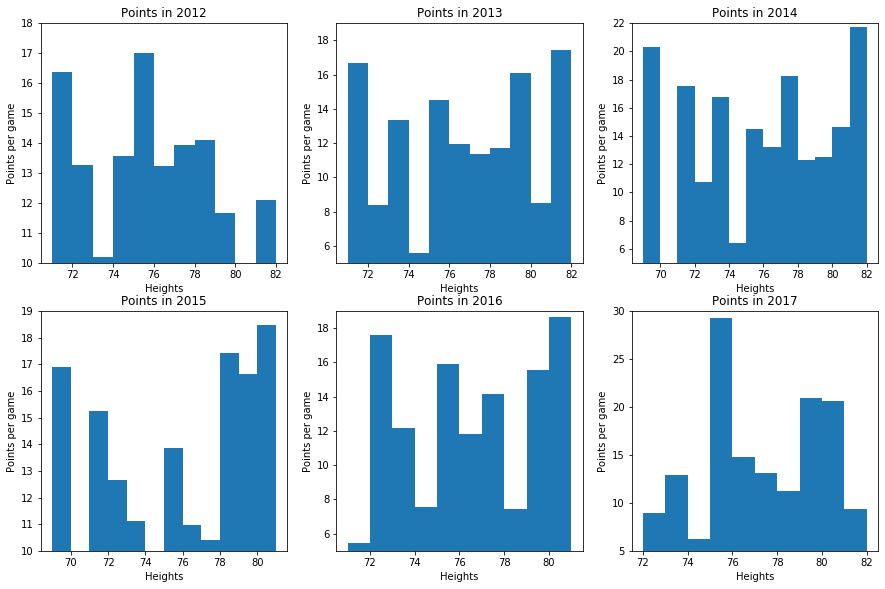

In [16]:
# Graphs of average points per game for point guards in 2012-2017 NBA seasons
# plt.ylim is used to get a more descriptive look at points of data that are graphed tightly together

plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.ylim(10,18)
plt.title("Points in 2012")
plt.xlabel("Heights")
plt.ylabel("Points per game")
plt.bar(x = df_2012_height, height = df_2012_points,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.ylim(5,19)
plt.title("Points in 2013")
plt.xlabel("Heights")
plt.ylabel("Points per game")
plt.bar(x = df_2013_height, height = df_2013_points,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.ylim(5,22)
plt.title("Points in 2014")
plt.xlabel("Heights")
plt.ylabel("Points per game")
plt.bar(x = df_2014_height, height = df_2014_points,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.ylim(10,19)
plt.title("Points in 2015")
plt.xlabel("Heights")
plt.ylabel("Points per game")
plt.bar(x = df_2015_height, height = df_2015_points,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.ylim(5,19)
plt.title("Points in 2016")
plt.xlabel("Heights")
plt.ylabel("Points per game")
plt.bar(x = df_2016_height, height = df_2016_points,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.ylim(5,30)
plt.title("Points in 2017")
plt.xlabel("Heights")
plt.ylabel("Points per game")
plt.bar(x = df_2017_height, height = df_2017_points,width = 1, align  = 'edge')


plt.show()

These plots highlight the average points per game for players that are between 70 to 82 inches tall

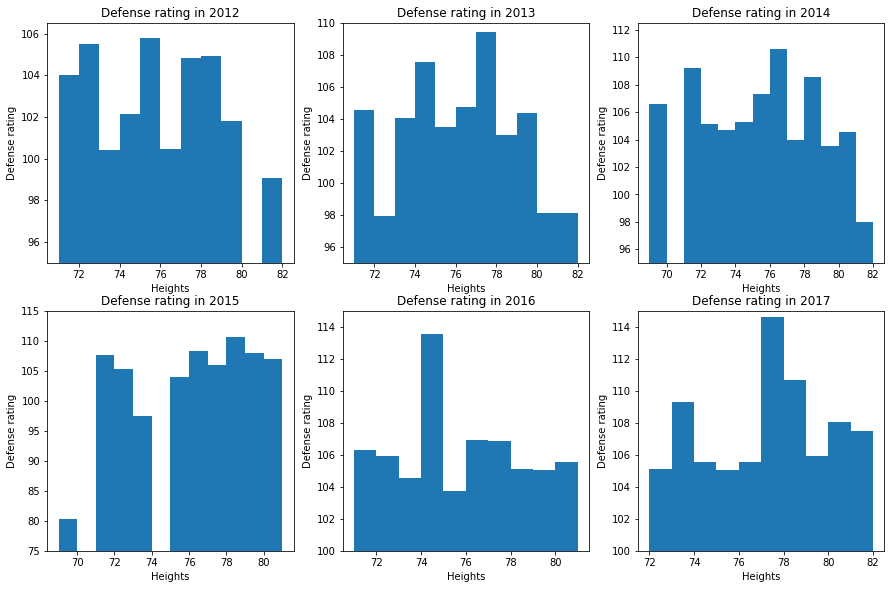

In [17]:
# Graphs of average defensive rating for point guards in the 2012-2017 NBA seasons
# plt.ylim is used to get a more descriptive look at points of data that are graphed tightly together

plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.ylim(95,106.5)
plt.title("Defense rating in 2012")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2012_height, height = df_2012_defense,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.ylim(95,110)
plt.title("Defense rating in 2013")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2013_height, height = df_2013_defense,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.ylim(95,112.5)
plt.title("Defense rating in 2014")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2014_height, height = df_2014_defense,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.ylim(75,115)
plt.title("Defense rating in 2015")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2015_height, height = df_2015_defense,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.ylim(100,115)
plt.title("Defense rating in 2016")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2016_height, height = df_2016_defense,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.ylim(100,115)
plt.title("Defense rating in 2017")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2017_height, height = df_2017_defense,width = 1, align  = 'edge')


plt.show()

These plots highlight the average defensive ratings for players that are between 70 to 82 inches tall

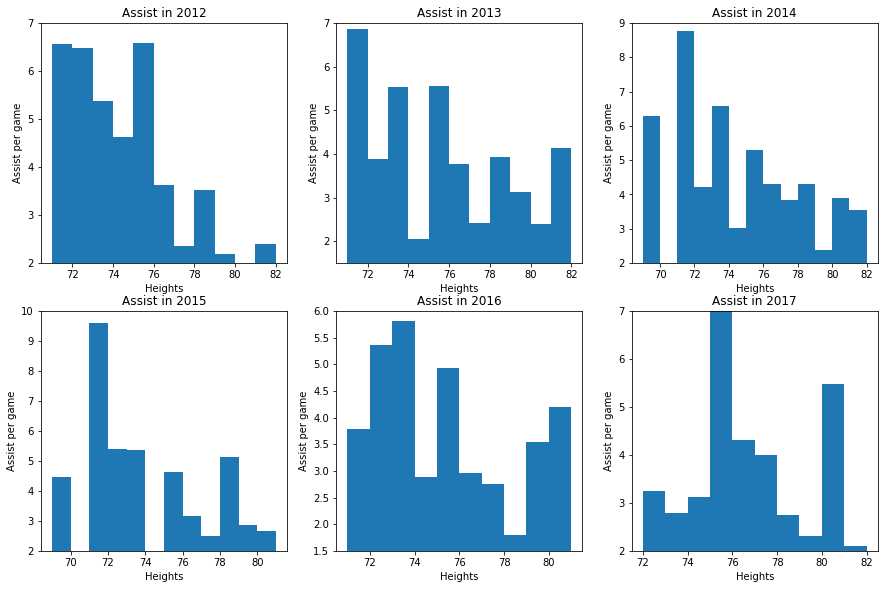

In [18]:
# Graphs of average assists per game for point guards in the 2012-2017 NBA seasons
# plt.ylim is used to get a more descriptive look at points of data that are graphed tightly together

plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.ylim(2,7)
plt.title("Assist in 2012")
plt.xlabel("Heights")
plt.ylabel("Assist per game")
plt.bar(x = df_2012_height, height = df_2012_assist,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.ylim(1.5,7)
plt.title("Assist in 2013")
plt.xlabel("Heights")
plt.ylabel("Assist per game")
plt.bar(x = df_2013_height, height = df_2013_assist,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.ylim(2,9)
plt.title("Assist in 2014")
plt.xlabel("Heights")
plt.ylabel("Assist per game")
plt.bar(x = df_2014_height, height = df_2014_assist,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.ylim(2,10)
plt.title("Assist in 2015")
plt.xlabel("Heights")
plt.ylabel("Assist per game")
plt.bar(x = df_2015_height, height = df_2015_assist,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.ylim(1.5,6)
plt.title("Assist in 2016")
plt.xlabel("Heights")
plt.ylabel("Assist per game")
plt.bar(x = df_2016_height, height = df_2016_assist,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.ylim(2,7)
plt.title("Assist in 2017")
plt.xlabel("Heights")
plt.ylabel("Assist per game")
plt.bar(x = df_2017_height, height = df_2017_assist,width = 1, align  = 'edge')


plt.show()

These plots highlight the average assits per game for players that are between 70 to 82 inches tall

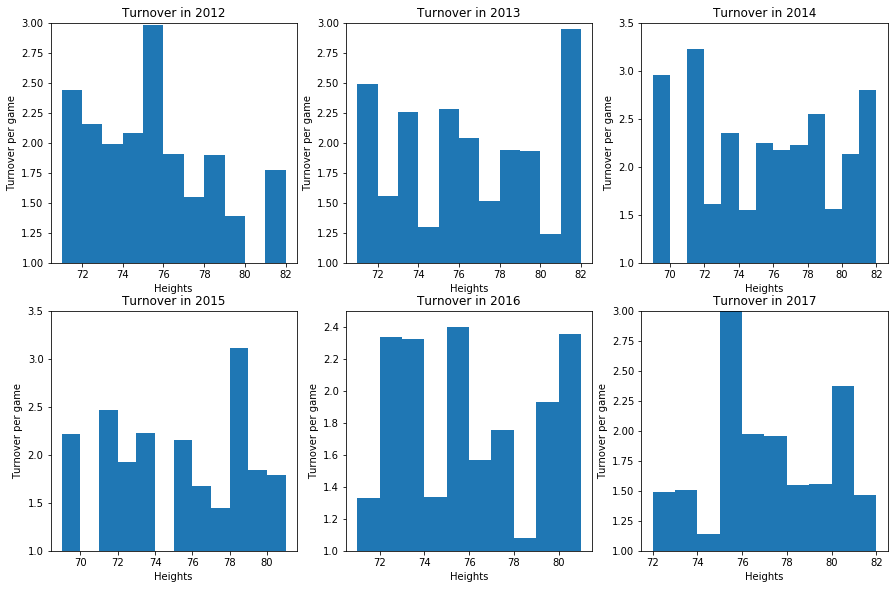

In [19]:
# Graphs of average turnovers per game for point guards in the 2012-2017 NBA seasons
# plt.ylim is used to get a more descriptive look at points of data that are graphed tightly together

plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.ylim(1,3)
plt.title("Turnover in 2012")
plt.xlabel("Heights")
plt.ylabel("Turnover per game")
plt.bar(x = df_2012_height, height = df_2012_turnover,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.ylim(1,3)
plt.title("Turnover in 2013")
plt.xlabel("Heights")
plt.ylabel("Turnover per game")
plt.bar(x = df_2013_height, height = df_2013_turnover,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.ylim(1,3.5)
plt.title("Turnover in 2014")
plt.xlabel("Heights")
plt.ylabel("Turnover per game")
plt.bar(x = df_2014_height, height = df_2014_turnover,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.ylim(1,3.5)
plt.title("Turnover in 2015")
plt.xlabel("Heights")
plt.ylabel("Turnover per game")
plt.bar(x = df_2015_height, height = df_2015_turnover,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.ylim(1,2.5)
plt.title("Turnover in 2016")
plt.xlabel("Heights")
plt.ylabel("Turnover per game")
plt.bar(x = df_2016_height, height = df_2016_turnover,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.ylim(1,3)
plt.title("Turnover in 2017")
plt.xlabel("Heights")
plt.ylabel("Turnover per game")
plt.bar(x = df_2017_height, height = df_2017_turnover,width = 1, align  = 'edge')


plt.show()

These plots highlight the average turnover per game for players that are between 70 to 82 inches tall

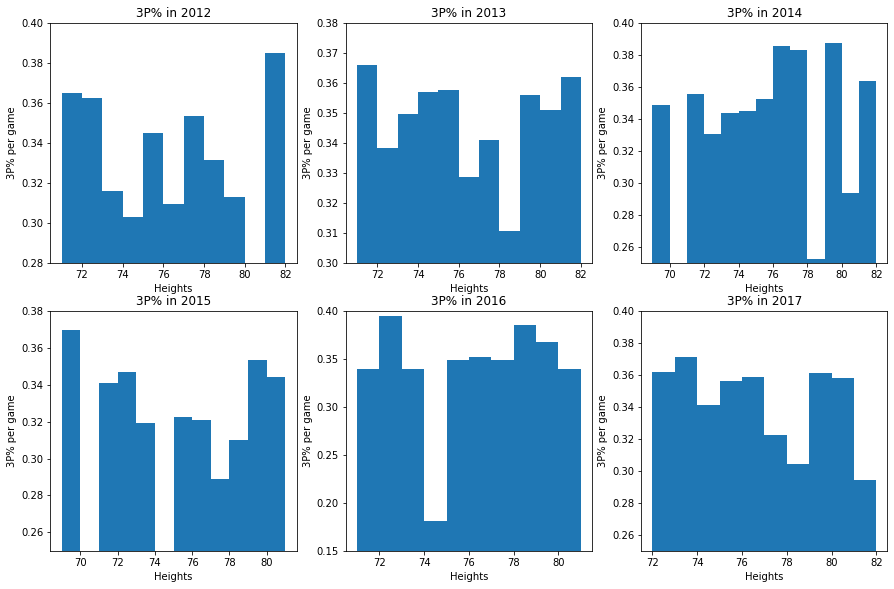

In [20]:
# Graphs of average 3pt percentage per game for point guards in the 2012-2017 NBA seasons
# plt.ylim is used to get a more descriptive look at points of data that are graphed tightly together


plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.ylim(.28,.4)
plt.title("3P% in 2012")
plt.xlabel("Heights")
plt.ylabel("3P% per game")
plt.bar(x = df_2012_height, height = df_2012_3percent,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.ylim(.3,.38)
plt.title("3P% in 2013")
plt.xlabel("Heights")
plt.ylabel("3P% per game")
plt.bar(x = df_2013_height, height = df_2013_3percent,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.ylim(.25,.4)
plt.title("3P% in 2014")
plt.xlabel("Heights")
plt.ylabel("3P% per game")
plt.bar(x = df_2014_height, height = df_2014_3percent,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.ylim(.25,.38)
plt.title("3P% in 2015")
plt.xlabel("Heights")
plt.ylabel("3P% per game")
plt.bar(x = df_2015_height, height = df_2015_3percent,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.ylim(.15,.4)
plt.title("3P% in 2016")
plt.xlabel("Heights")
plt.ylabel("3P% per game")
plt.bar(x = df_2016_height, height = df_2016_3percent,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.ylim(.25,.4)
plt.title("3P% in 2017")
plt.xlabel("Heights")
plt.ylabel("3P% per game")
plt.bar(x = df_2017_height, height = df_2017_3percent,width = 1, align  = 'edge')


plt.show()

These plots highlight the average 3 point percentage per game for players that are between 70 to 82 inches tall

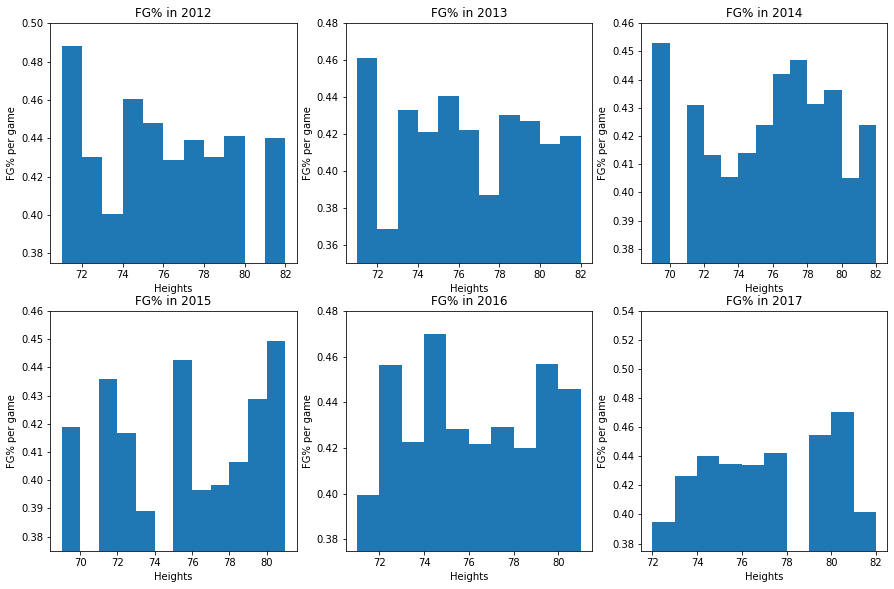

In [21]:
# Graphs of average field goal percentage per game for point guards in the 2012-2017 NBA seasons
# plt.ylim is used to get a more descriptive look at points of data that are graphed tightly together

plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.ylim(.375,.5)
plt.title("FG% in 2012")
plt.xlabel("Heights")
plt.ylabel("FG% per game")
plt.bar(x = df_2012_height, height = df_2012_FGpercent,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.ylim(.35,.48)
plt.title("FG% in 2013")
plt.xlabel("Heights")
plt.ylabel("FG% per game")
plt.bar(x = df_2013_height, height = df_2013_FGpercent,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.ylim(.375,.46)
plt.title("FG% in 2014")
plt.xlabel("Heights")
plt.ylabel("FG% per game")
plt.bar(x = df_2014_height, height = df_2014_FGpercent,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.ylim(.375,.46)
plt.title("FG% in 2015")
plt.xlabel("Heights")
plt.ylabel("FG% per game")
plt.bar(x = df_2015_height, height = df_2015_FGpercent,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.ylim(.375,.48)
plt.title("FG% in 2016")
plt.xlabel("Heights")
plt.ylabel("FG% per game")
plt.bar(x = df_2016_height, height = df_2016_FGpercent,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.ylim(.375,.54)
plt.title("FG% in 2017")
plt.xlabel("Heights")
plt.ylabel("FG% per game")
plt.bar(x = df_2017_height, height = df_2017_FGpercent,width = 1, align  = 'edge')


plt.show()

These plots highlight the average field goal percentage per game for players that are between 70 to 82 inches tall

We then created a Weights class which we utilize the standard deviation found earlier from the normalized graphs to determine our definition for performance/success for point guards. By multiplying the values from each stat (points, assists, defense, etc.) with the standard deviation value we can see the total weight that each stat has on a player and  calculate and determine success for each height.

In [22]:
class Weights:
    
    def __init__(self,points,assist,three_point_percent,field_goal_percent,turnover,defense,std):
        self.points = points
        self.assist = assist
        self.three_point_percent = three_point_percent
        self.field_goal_percent = field_goal_percent
        self.turnover = turnover
        self.defense = defense
        self.std = std
        
    def point(self):
        self.points = self.points * self.std[0] 
         
    def assists(self):
        self.assist = self.assist * self.std[1]
    
    def three_percent(self):
        self.three_point_percent = self.three_point_percent * self.std[5]
        
    def field_percent(self):
        self.field_goal_percent = self.field_goal_percent * self.std[4]
        
    def turnovers(self):
        self.turnover = self.turnover * self.std[2]
        
    def defense_rating(self):
        self.defense = self.defense * self.std[3]
    
    # Combining all stats with standard deviation we get the weight calculation which we will utilize for each seperate year.
    def weight_calculation(self):
        weight = self.points + self.assist + self.three_point_percent + self.field_goal_percent + self.turnover + self.defense
        return weight       

We then convert all of our normalized stats to numpy arrays in order to use our Weights class to calculate player's performance

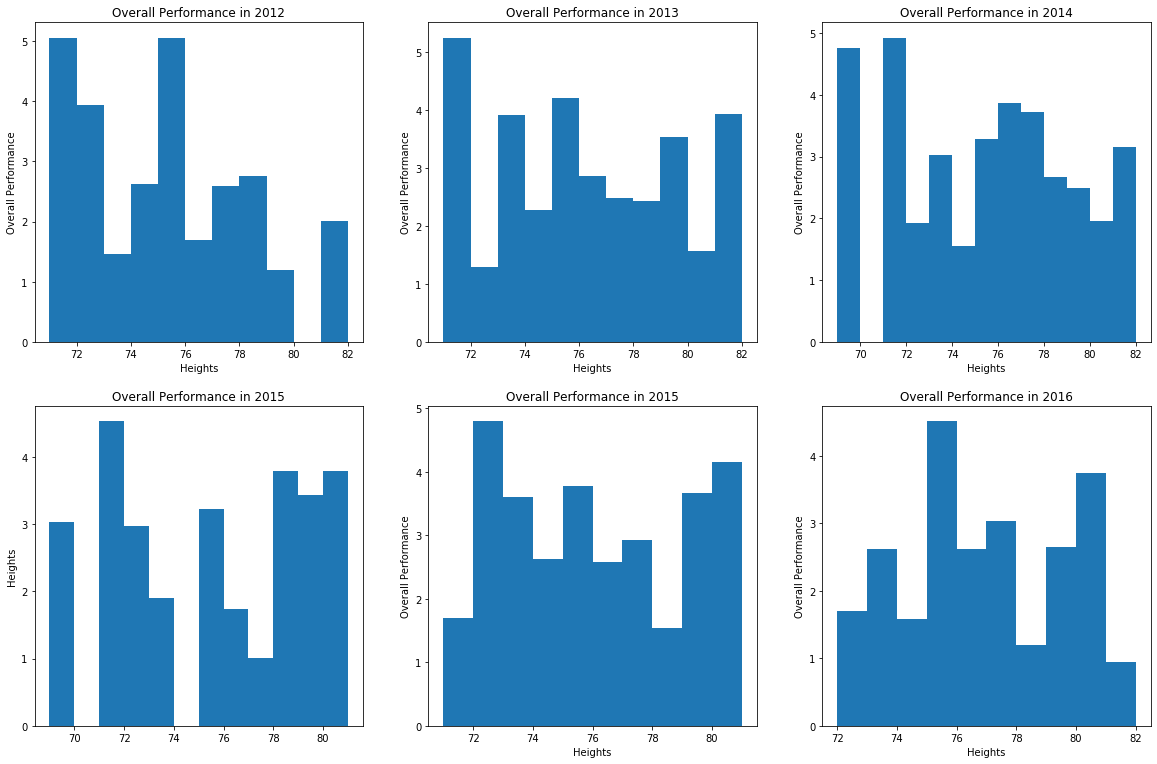

In [23]:
#convert data frame into numpy array for caculation of total weights

"""
norm_points_2012
norm_assist_2012
norm_to_2012
norm_def_2012
norm_fg_2012
norm_3point_2012

"""
norm_points_2012 = np.array(norm_points_2012)
norm_assist_2012 = np.array(norm_assist_2012)
norm_3point_2012 = np.array(norm_3point_2012)
norm_fg_2012 = np.array(norm_fg_2012)
norm_to_2012 = np.array(norm_to_2012)
norm_def_2012 = np.array(norm_def_2012)

norm_points_2013 = np.array(norm_points_2013)
norm_assist_2013 = np.array(norm_assist_2013)
norm_3point_2013 = np.array(norm_3point_2013)
norm_fg_2013 = np.array(norm_fg_2013)
norm_to_2013 = np.array(norm_to_2013)
norm_def_2013 = np.array(norm_def_2013)

norm_points_2014 = np.array(norm_points_2014)
norm_assist_2014 = np.array(norm_assist_2014)
norm_3point_2014 = np.array(norm_3point_2014)
norm_fg_2014 = np.array(norm_fg_2014)
norm_to_2014 = np.array(norm_to_2014)
norm_def_2014 = np.array(norm_def_2014)

norm_points_2015 = np.array(norm_points_2015)
norm_assist_2015 = np.array(norm_assist_2015)
norm_3point_2015 = np.array(norm_3point_2015)
norm_fg_2015 = np.array(norm_fg_2015)
norm_to_2015 = np.array(norm_to_2015)
norm_def_2015 = np.array(norm_def_2015)

norm_points_2016 = np.array(norm_points_2016)
norm_assist_2016 = np.array(norm_assist_2016)
norm_3point_2016 = np.array(norm_3point_2016)
norm_fg_2016 = np.array(norm_fg_2016)
norm_to_2016 = np.array(norm_to_2016)
norm_def_2016 = np.array(norm_def_2016)

norm_points_2017 = np.array(norm_points_2017)
norm_assist_2017 = np.array(norm_assist_2017)
norm_3point_2017 = np.array(norm_3point_2017)
norm_fg_2017 = np.array(norm_fg_2017)
norm_to_2017 = np.array(norm_to_2017)
norm_def_2017 = np.array(norm_def_2017)

# Utilize Weight class we implemented above to calculate weights for each year

weight2012 = Weights(norm_points_2012,norm_assist_2012,norm_3point_2012,norm_fg_2012,norm_to_2012,norm_def_2012,std_2012)
performance2012 = weight2012.weight_calculation()

weight2013 = Weights(norm_points_2013,norm_assist_2013,norm_3point_2013,norm_fg_2013,norm_to_2013,norm_def_2013,std_2013)
performance2013 = weight2013.weight_calculation()

weight2014 = Weights(norm_points_2014,norm_assist_2014,norm_3point_2014,norm_fg_2014,norm_to_2014,norm_def_2014,std_2014)
performance2014 = weight2014.weight_calculation()

weight2015 = Weights(norm_points_2015,norm_assist_2015,norm_3point_2015,norm_fg_2015,norm_to_2015,norm_def_2015,std_2015)
performance2015 = weight2015.weight_calculation()

weight2016 = Weights(norm_points_2016,norm_assist_2016,norm_3point_2016,norm_fg_2016,norm_to_2016,norm_def_2016,std_2016)
performance2016 = weight2016.weight_calculation()

weights2017 = Weights(norm_points_2017,norm_assist_2017,norm_3point_2017,norm_fg_2017,norm_to_2017,norm_def_2017,std_2017)
performance2017 = weights2017.weight_calculation()

# Plots the performances of players of differing heights for the 2012-2017 NBA seasons
height = range(71,81)
height = np.array(height)

plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
plt.title("Overall Performance in 2012")
plt.ylabel("Overall Performance")
plt.xlabel("Heights")
plt.bar(x = df_2012_height, height = performance2012,width = 1, align  = 'edge')


plt.subplot(3,3,2)
plt.title("Overall Performance in 2013")
plt.ylabel("Overall Performance")
plt.xlabel("Heights")
plt.bar(x = df_2013_height, height = performance2013,width = 1, align  = 'edge')

plt.subplot(3,3,3)
plt.title("Overall Performance in 2014")
plt.ylabel("Overall Performance")
plt.xlabel("Heights")
plt.bar(x = df_2014_height, height = performance2014,width = 1, align  = 'edge')

plt.subplot(3,3,4)
plt.title("Overall Performance in 2015")
plt.ylabel("Overall Performance")
plt.ylabel("Heights")
plt.bar(x = df_2015_height, height = performance2015,width = 1, align  = 'edge')

plt.subplot(3,3,5)
plt.title("Overall Performance in 2015")
plt.ylabel("Overall Performance")
plt.xlabel("Heights")
plt.bar(x = df_2016_height, height = performance2016,width = 1, align  = 'edge')

plt.subplot(3,3,6)
plt.title("Overall Performance in 2016")
plt.ylabel("Overall Performance")
plt.xlabel("Heights")
plt.bar(x = df_2017_height, height = performance2017,width = 1, align  = 'edge')


plt.show()

These plots show the overall performance or success we are measuring in order to answer our research question in determining the correlation between height and a point guards success. From these plots we can see that shorter players on average perform slightly better.

Text(0, 0.5, 'Height/Performance P-value')

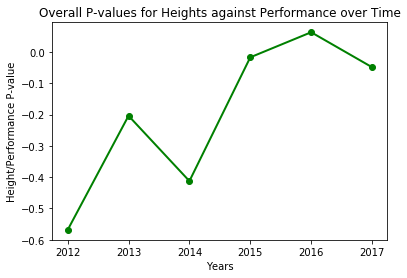

In [24]:
import scipy.stats as sc

performance = [0] * 6

performance[0] = sc.pearsonr(performance2012, range(0, len(performance2012)))[0]
performance[1] = sc.pearsonr(performance2013, range(0, len(performance2013)))[0]
performance[2] = sc.pearsonr(performance2014, range(0, len(performance2014)))[0]
performance[3] = sc.pearsonr(performance2015, range(0, len(performance2015)))[0]
performance[4] = sc.pearsonr(performance2016, range(0, len(performance2016)))[0]
performance[5] = sc.pearsonr(performance2017, range(0, len(performance2017)))[0]

plt.plot([2012, 2013, 2014, 2015, 2016, 2017], performance, 'go-', label='line 1', linewidth=2)
plt.title("Overall P-values for Heights against Performance over Time")
plt.xlabel("Years")
plt.ylabel("Height/Performance P-value")

We calculate the correlation between the different player statistics and player height using the average stats from all six years. We can see that although shorter players seem to perform better there is an upward trend that showcases less correlation between height and success where taller players seem to perform just as good as shorter players.

In [27]:
# Combines an array of stats with its corresponding heights
def combine(heights, stats) :
    total = [0] * len(heights)
    for i in range(0, len(heights)) :
        total[i] = [heights[i], stats[i]]
    return total

# calculates the mean of a stat over all sic=x years
def calc_mean(_2017, _2016, _2015, _2014, _2013, _2012) :
    
    # We combine all of the datasets
    combined_2017 = pd.DataFrame(data=combine(_2017[0], _2017[1]), columns=['height', '2017'])
    combined_2017 = combined_2017.set_index('height')

    combined_2016 = pd.DataFrame(data=combine(_2016[0], _2016[1]), columns=['height', '2016'])
    combined_2016 = combined_2016.set_index('height')

    combined_2015 = pd.DataFrame(data=combine(_2015[0], _2015[1]), columns=['height', '2015'])
    combined_2015 = combined_2015.set_index('height')

    combined_2014 = pd.DataFrame(data=combine(_2014[0], _2014[1]), columns=['height', '2014'])
    combined_2014 = combined_2014.set_index('height')

    combined_2013 = pd.DataFrame(data=combine(_2013[0], _2013[1]), columns=['height', '2013'])
    combined_2013 = combined_2013.set_index('height')

    combined_2012 = pd.DataFrame(data=combine(_2012[0], _2012[1]), columns=['height', '2012'])
    combined_2012 = combined_2012.set_index('height')

    total = pd.DataFrame(data=df_2017_height, columns=['height'])
    total = total.set_index('height')

    # We merge all the datasets and return its mean
    total = total.merge(combined_2017, how='left', on='height')
    total = total.merge(combined_2016, how='left', on='height')
    total = total.merge(combined_2015, how='left', on='height')
    total = total.merge(combined_2014, how='left', on='height')
    total = total.merge(combined_2013, how='left', on='height')
    total = total.merge(combined_2012, how='left', on='height')
    return pd.DataFrame(total.mean(axis=1), columns=['mean'])

# We calculate the mean of all player stats over all six years in order to calculate its p-values
points_mean = calc_mean([df_2017_height, df_2017_points], [df_2016_height, df_2016_points], [df_2015_height, df_2015_points], [df_2014_height, df_2014_points], [df_2013_height, df_2013_points], [df_2012_height, df_2012_points])
assist_mean = calc_mean([df_2017_height, df_2017_assist], [df_2016_height, df_2016_assist], [df_2015_height, df_2015_assist], [df_2014_height, df_2014_assist], [df_2013_height, df_2013_assist], [df_2012_height, df_2012_assist])
turnover_mean = calc_mean([df_2017_height, df_2017_turnover], [df_2016_height, df_2016_turnover], [df_2015_height, df_2015_turnover], [df_2014_height, df_2014_turnover], [df_2013_height, df_2013_turnover], [df_2012_height, df_2012_turnover])
three_percent_mean = calc_mean([df_2017_height, df_2017_3percent], [df_2016_height, df_2016_3percent], [df_2015_height, df_2015_3percent], [df_2014_height, df_2014_3percent], [df_2013_height, df_2013_3percent], [df_2012_height, df_2012_3percent])
FGpercent_mean = calc_mean([df_2017_height, df_2017_FGpercent], [df_2016_height, df_2016_FGpercent], [df_2015_height, df_2015_FGpercent], [df_2014_FGpercent, df_2014_FGpercent], [df_2013_height, df_2013_FGpercent], [df_2012_height, df_2012_FGpercent])
defense_mean = calc_mean([df_2017_height, df_2017_defense], [df_2016_height, df_2016_defense], [df_2015_height, df_2015_defense], [df_2014_height, df_2014_defense], [df_2013_height, df_2013_defense], [df_2012_height, df_2012_defense])

# We calculate the p-values of each stat
print("Points P-value: ", sc.pearsonr(points_mean['mean'].to_list(), range(0, len(points_mean.to_numpy())))[0])
print("Assists P-value: ", sc.pearsonr(assist_mean['mean'].to_list(), range(0, len(assist_mean.to_numpy())))[0])
print("Turnovers P-value: ", sc.pearsonr(turnover_mean['mean'].to_list(), range(0, len(turnover_mean.to_numpy())))[0])
print("3 Point Percent P-Value: ", sc.pearsonr(three_percent_mean['mean'].to_list(), range(0, len(three_percent_mean.to_numpy())))[0])
print("FG Percent P-Value: ", sc.pearsonr(FGpercent_mean['mean'].to_list(), range(0, len(FGpercent_mean.to_numpy())))[0])
print("Defensive Rating P-Value: ", sc.pearsonr(defense_mean['mean'].to_list(), range(0, len(defense_mean.to_numpy())))[0])

Points P-value:  0.5182104951452369
Assists P-value:  -0.619821516862742
Turnovers P-value:  0.09162183946784433
3 Point Percent P-Value:  0.10807371426095645
FG Percent P-Value:  0.1832240820156853
Defensive Rating P-Value:  -0.21955911580174342


# Ethics & Privacy (WIP)

All the datasets we are using in our models contain information on individual basketball players in the NBA. This information is derived from either the NBA itself (stats.nba.com), or Kaggle who pulled their data from basketball-reference.com which received its data from contributions from private contributers such as the respected database journalist Sean Lahman.

While all the data collected follows the rules and regulations the NBA holds for the privacy of its players, recently there has been growing privacy concerns as the technology used to track players off the court has improved. One of the largest concerns of Players Unions are the blood tests some NBA teams are using to track performace of its players. While player data points and assists per game are resonable to keep track of, when it comes to the bodily functions of individuals on and off the court the boundaries of privacy become much more mudled. For our project we made sure to only utilize data points derived from on court performance as to maintain the privacy of the players. The only exception to this of course is height.

When trying to compare player performance and the unchangable attributes of players' bodies there are some obvious ethical issues that may arise. For instance, if we found that the shorter a point guard was the worse their performance, these findings could lead to discrimination against shorter in the future. We took this into account when deciding on this question, however, we came to the conclusion that the meta of basketball is constantly changing meaning different heights of players can be more effective depending on the season. Any discrimination on players because of their height would be unfounded because the meta could easily shift between seasons.


# Conclusion & Discussion (WIP)

Through our analysis of our data above we conclude that our initial hypothesis, which we stated that taller point guards would be overall more successful and perform better, was actually proven wrong. From our research we could actually see a correlation where overall shorter point guards tended to perform better than their taller counterparts in all seasons we looked at from 2012-2017. Although we saw that these shorter players were more sucessful it is also important to note that there was an upward trend from 2012-2017 where taller players started to perform just as good and there with less of a correlation between height and success. 

We came to this conclusion through using a weights system, where we found how impactful each statistic was for a point guard (points, assists, etc.) through looking at standard deviation of these stats throughout each player and through each year. These weights were then added to players' actual stats where we then looked at how well they actually performed compared to their height. It is also interesting to note that we found correlations between which stats players were better at recording given their height. For example we found that shorter players tended to be better at getting assits and shoot better from the 3 point range, while taller players were better at overall field goal percentage and scoring more points.

Although we found supporting evidence that shorter players performed better limitations to our project include the extreme outliers for each season. As previously discussed in our hypothesis when talking about notable point guards like Stephen Curry, star players like Isaiah Thomas (5'9), Chris Paul (6'0), Rajon Rondo (6'1) had incredible seasons. With the low number of short players (6'3 and under) compared to the greater majority these star players could overpower our data giving us a more skewed representation. Ultimately our work on this project answers a widely held question in the world of basketball, highlighting how even the shorter players can outperform their taller opponents based purely on their skillset even if they might lack a natural advantage. 

# Team Contributions

Throughout the whole project our team contributed a fairly even amount of work. Everyone had their own ideas when we were initially brainstorming our topic but eventually decided to focus on basketball and came up with our hypothesis as a collective. After we got our feedback, Chris then edited it to make it more specific, adding finer details to our project's idea and revising both our hypothesis and background information clearing up any confusion about our idea. Kevin also provided the descriptions for all datasets used as well as added more information to the background and prior work section.
        

We all helped find appropriate datasets for the project, these included both the defensive stats which Anwar found as well as the season stats and player stats that Kevin, Chris and Jake found. Jake and Kevin then began to focus on cleaning and merging the datasets. Anwar and Chris then began to find the standard deviation between height and each of our categories(points, assists, defensive rating, 3 point percentage, field goal percentage, and turnovers) for each year, then making graphs for comparing height and each category for each year. Kevin analyzed the data, adding to our conclusion and discussion section with assistance from Anwar, while Jake finished the project by writing the ethics and privacy portion of the project.
